I plan to choose the particular type of tweets, stocktwits.com which has tweets related to the stock market. The tweets are particularly of two sentiments like positive the stock price will go up(bull) and the negative the stock price will go down(bearish). I gathered more than 2000 stocktwits for different tickers which were recent to a few years ago.These tweets are 100 files, each file for each ticker. So I  use the glob module to merge them into a single file. After that I change the merged dataset into the pandas dataframe, as it is easy to work. Here I build the supervised RNN model  and LSTM model to classify the sentiment of the text data. I further evaluate the performance of the two model. 


#Importing the necessary modules


In [ ]:
import pandas as pd
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import gensim
import itertools
from keras.layers import SimpleRNN, Embedding, Dense, LSTM
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers

In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#Data cleaning

In [ ]:
# reading the csv file
df_google = pd.read_csv('/content/drive/MyDrive/Spring_board_EDA/df_go_score_twits.csv')

In [ ]:
def clean_tweet(tweet):
  tweet = re.sub(r"[$]\w+", "", tweet)# remove the tickers at any place with dollar sign
  tweet = re.sub(r"[u]\d+", "", tweet)# remove anything starting with u and the digits
  tweet = re.sub('\S*@\S*\s?', '', tweet)#remove emails
  tweet=  re.sub('((www\.[^\s]+)|(https?://[^\s]+))','', tweet)# remove the url
  tweet = ' '.join(re.sub('(@[A-Za-z0-9]+)|([^A-Za-z0-9 \t])|(\w+:\/\/\S+)', ' ', tweet).lower().split())
  tweet = lemmatizer.lemmatize(tweet)
  #tweet = porters.stem(tweet)
  return tweet

In [ ]:
lemmatizer = WordNetLemmatizer()
#porters = PorterStemmer()
df_google["Clean_Tweet"] = df_google['twits'].apply(lambda x: clean_tweet(x))

In [ ]:
df_google["Clean_Tweet"][1]

'asxc this is the future of surgery with senhance no other competitor has this kind of ai technology senhance will be the gold standard for surgery in the upcoming years minimum buyout value 2 4b per share'

In [ ]:
stops = stopwords.words('english')
# we can find lots of single letters so append with the stop words
list_stops = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'l','m', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u','v', 'w', 'x', 'y', 'z']
for i in list_stops:
    stops.append(i)

In [ ]:
#remove the stop words
df_google['Clean_Tweet_rm'] = df_google['Clean_Tweet'].apply(lambda x: [item for item in x.split() if item not in stops])

In [ ]:
#join the words after the stop words are removed
df_google['Clean_Tweet_rm'] = df_google['Clean_Tweet_rm'].apply(lambda x: ' '.join(x))

In [ ]:
df_google['Clean_Tweet_rm'][1]

'asxc future surgery senhance competitor kind ai technology senhance gold standard surgery upcoming years minimum buyout value 2 4b per share'

In [ ]:
t = []
k = []
for i in range(0, len(df_google["Clean_Tweet_rm"])):
  t.append(len(df_google["Clean_Tweet_rm"][i].split()))
  k.append(df_google["Clean_Tweet_rm"][i].split())


In [ ]:
max_features = len(set(list(itertools.chain.from_iterable(k))))
print(max_features)

5421


In [ ]:
max(t), len(t), sum(t)

(133, 2737, 33864)

In [ ]:
df_google["Clean_Tweet_rm"]

0       site traffic direct sales revelation 2020 cont...
1       asxc future surgery senhance competitor kind a...
2       stock market tanked couple times unmoved tradi...
3       loss sucks right 39 debated selling taking los...
4       lot warrants profitable far anyone know suppos...
                              ...                        
2732    new sec filing evp general counsel corp sec da...
2733       evp anika therapeutics inc picked 2 500 shares
2734                                          22 end week
2735    15s delayed filed sec form 4 evp general couns...
2736    ud83d udcdc sec form 4 david colleran exercise...
Name: Clean_Tweet_rm, Length: 2737, dtype: object

In [ ]:
df_google["Clean_Tweet_rm"][1].split()

['asxc',
 'future',
 'surgery',
 'senhance',
 'competitor',
 'kind',
 'ai',
 'technology',
 'senhance',
 'gold',
 'standard',
 'surgery',
 'upcoming',
 'years',
 'minimum',
 'buyout',
 'value',
 '2',
 '4b',
 'per',
 'share']

In [ ]:
max_words = 48331
max_len = 500
#def token_vector(data):
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df_google['Clean_Tweet_rm'])
sequences = tokenizer.texts_to_sequences(df_google['Clean_Tweet_rm'])
df_google_vector = pad_sequences(sequences, maxlen=max_len)
word_index = tokenizer.word_index

print(word_index)
  #print(tweets)

{'amp': 1, 'form': 2, 'shares': 3, 'filed': 4, 'ud83d': 5, '39': 6, 'sec': 7, 'utm': 8, 'price': 9, '4': 10, 'new': 11, '2': 12, '2021': 13, 'stock': 14, '3': 15, 'time': 16, '00': 17, 'delayed': 18, '15s': 19, 'american': 20, 'securities': 21, 'sold': 22, 'k': 23, 'large': 24, '1': 25, 'surgery': 26, 'senhance': 27, 'inc': 28, 'amount': 29, 'share': 30, 'size': 31, 'print': 32, '8': 33, 'common': 34, 'ownership': 35, 'day': 36, 'medium': 37, 'view': 38, 'odds': 39, 'campaign': 40, '0': 41, 'stocks': 42, 'insider': 43, '10': 44, 'corp': 45, 'units': 46, 'filing': 47, 'announces': 48, 'indicators': 49, 'technology': 50, 'ude80': 51, 'udcdc': 52, 'average': 53, 'director': 54, '12': 55, 'ud83c': 56, 'buy': 57, 'today': 58, 'article': 59, 'upcoming': 60, 'value': 61, 'years': 62, 'financial': 63, 'march': 64, '03': 65, 'report': 66, '5': 67, '50': 68, '16': 69, 'pharmaceuticals': 70, 'per': 71, '2020': 72, 'acquisition': 73, 'buyout': 74, 'ai': 75, 'big': 76, 'quot': 77, '15': 78, 'going'

In [ ]:
df_google_vector.shape

(2737, 500)

In [ ]:
df_google.head()

,Unnamed: 0,date,user,twits,score,sent_category,Clean_Tweet,Clean_Tweet_rm
0,0,3/24/2021 4:49:50 AM,utahstock12,['$ANDA Their site traffic for direct sales wh...,0.85,1,their site traffic for direct sales which was ...,site traffic direct sales revelation 2020 cont...
1,1,3/23/2021 10:09:25 PM,dinoshanahan,['$ANDA ASXC This is the future of surgery wit...,0.75,1,asxc this is the future of surgery with senhan...,asxc future surgery senhance competitor kind a...
2,2,3/18/2021 8:08:27 PM,Tiggers23,['$ANDA stock market has now tanked a couple t...,0.45,-1,stock market has now tanked a couple times and...,stock market tanked couple times unmoved tradi...
3,3,3/18/2021 5:31:56 PM,gimestocky,['$BENEU so the loss on this sucks right now a...,0.45,-1,so the loss on this sucks right now and i 39 v...,loss sucks right 39 debated selling taking los...
4,4,3/17/2021 5:36:28 PM,GreenOnMe,['$ANDA Have a lot of warrants very profitable...,0.55,1,have a lot of warrants very profitable so far ...,lot warrants profitable far anyone know suppos...


In [ ]:
#change the -ve sentiment to zero
df_google[df_google['sent_category'] == -1] = 0

In [ ]:
df_google['sent_category']

0       1
1       1
2       0
3       0
4       1
       ..
2732    0
2733    0
2734    0
2735    1
2736    0
Name: sent_category, Length: 2737, dtype: int64

#Preprocessing

In [ ]:
np.random.seed(42)
# shuffle data
indices = np.arange(df_google.shape[0])
np.random.shuffle(indices)
data = df_google_vector[indices]
labels = list(df_google['sent_category'][indices])

In [ ]:
data

array([[   0,    0,    0, ...,   34,   14,  173],
       [   0,    0,    0, ...,   41,  303,   95],
       [   0,    0,    0, ...,  232,  145,   12],
       ...,
       [   0,    0,    0, ...,  255,  125,   28],
       [   0,    0,    0, ..., 1235,  511,   14],
       [   0,    0,    0, ...,   38,   39,  155]], dtype=int32)

In [ ]:
training_samples = int(2737 * .8)
validation_samples = int(2737- training_samples)

In [ ]:
texts_train = np.array(data[:training_samples])
y_train = np.array(labels[:training_samples])
texts_test = np.array(data[training_samples:])
y_test = np.array(labels[training_samples:])

In [ ]:
len(texts_train[1])

500

# RNN model

In [ ]:
model = Sequential()
model.add(Embedding(max_features+1, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_rnn = model.fit(texts_train, y_train, epochs=14, batch_size=80, validation_split=0.2)

Epoch 1/14
22/22 [==============================] - 3s 109ms/step - loss: 0.6002 - acc: 0.6876 - val_loss: 0.5532 - val_acc: 0.7260
Epoch 2/14
22/22 [==============================] - 2s 98ms/step - loss: 0.5786 - acc: 0.6790 - val_loss: 0.5724 - val_acc: 0.7100
Epoch 3/14
22/22 [==============================] - 2s 98ms/step - loss: 0.4950 - acc: 0.7681 - val_loss: 0.5277 - val_acc: 0.7215
Epoch 4/14
22/22 [==============================] - 2s 97ms/step - loss: 0.4340 - acc: 0.7841 - val_loss: 0.5387 - val_acc: 0.7329
Epoch 5/14
22/22 [==============================] - 2s 95ms/step - loss: 0.3688 - acc: 0.8464 - val_loss: 0.4823 - val_acc: 0.7329
Epoch 6/14
22/22 [==============================] - 2s 96ms/step - loss: 0.3050 - acc: 0.9012 - val_loss: 0.4614 - val_acc: 0.7557
Epoch 7/14
22/22 [==============================] - 2s 96ms/step - loss: 0.2404 - acc: 0.9349 - val_loss: 0.4524 - val_acc: 0.7717
Epoch 8/14
22/22 [==============================] - 2s 96ms/step - loss: 0.2001 - 

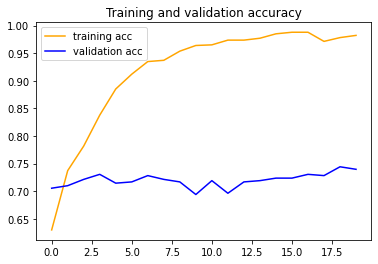

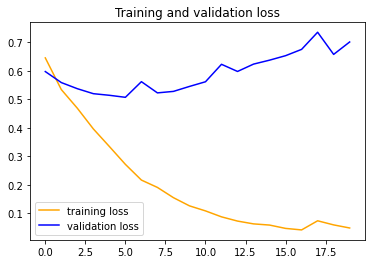

In [ ]:
acc = history_rnn.history['acc']
val_acc = history_rnn.history['val_acc']
loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training loss')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
pred = (model.predict(texts_test) > 0.5).astype("int32")
acc = model.evaluate(texts_test, y_test)
proba_embed = model.predict(texts_test)
from sklearn.metrics import confusion_matrix
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))
print(confusion_matrix(pred, y_test))

18/18 [==============================] - 0s 17ms/step - loss: 0.8685 - acc: 0.6131
Test loss is 0.87 accuracy is 0.61  
[[189  23]
 [189 147]]


#LSTM model

In [ ]:
model = Sequential()
model.add(Embedding(max_features+1, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_ltsm = model.fit(texts_train, y_train, epochs=14, batch_size=80, validation_split=0.2)

Epoch 1/14
22/22 [==============================] - 7s 229ms/step - loss: 0.6348 - acc: 0.6825 - val_loss: 0.5950 - val_acc: 0.7009
Epoch 2/14
22/22 [==============================] - 5s 206ms/step - loss: 0.5771 - acc: 0.7070 - val_loss: 0.5524 - val_acc: 0.7100
Epoch 3/14
22/22 [==============================] - 5s 209ms/step - loss: 0.5218 - acc: 0.7167 - val_loss: 0.5121 - val_acc: 0.7123
Epoch 4/14
22/22 [==============================] - 5s 209ms/step - loss: 0.4596 - acc: 0.7521 - val_loss: 0.4882 - val_acc: 0.7192
Epoch 5/14
22/22 [==============================] - 5s 208ms/step - loss: 0.4025 - acc: 0.7915 - val_loss: 0.4693 - val_acc: 0.7466
Epoch 6/14
22/22 [==============================] - 5s 206ms/step - loss: 0.3479 - acc: 0.8624 - val_loss: 0.4659 - val_acc: 0.7557
Epoch 7/14
22/22 [==============================] - 5s 206ms/step - loss: 0.2991 - acc: 0.8972 - val_loss: 0.4989 - val_acc: 0.7489
Epoch 8/14
22/22 [==============================] - 5s 210ms/step - loss: 0.

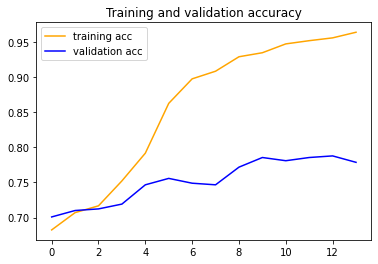

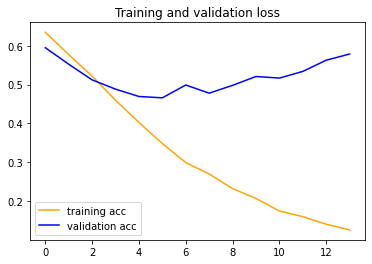

In [ ]:
acc = history_ltsm.history['acc']
val_acc = history_ltsm.history['val_acc']
loss = history_ltsm.history['loss']
val_loss = history_ltsm.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
pred = (model.predict(texts_test) > 0.5).astype("int32")
acc = model.evaluate(texts_test, y_test)
proba_ltsm = model.predict(texts_test)
from sklearn.metrics import confusion_matrix
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))
print(confusion_matrix(pred, y_test))

18/18 [==============================] - 1s 46ms/step - loss: 0.6450 - acc: 0.7518
Test loss is 0.64 accuracy is 0.75  
[[302  60]
 [ 76 110]]


#Combining  two models

In [ ]:
ensemble_proba = 0.3 * proba_embed + 0.7 * proba_ltsm

In [ ]:
ensemble_pred = np.array([1 if i >= 0.5 else 0 for i in ensemble_proba])

In [ ]:
print(confusion_matrix(ensemble_pred, y_test))


[[284  52]
 [ 94 118]]


In [ ]:
Accuracy = (284+118)/(94+52+284+118)
print(Accuracy)

0.7335766423357665
